<h1 style="font-size:3rem;color:orange;">2D and 3D CGA Practice</h1>

<img src="https://cdn.mecademic.com/uploads/img-tiny/galerie-meca500-1.jpg">

## Conformal Geometric Algebra (CGA)
* https://clifford.readthedocs.io/en/latest/tutorials/cga/index.html

In [2]:
from numpy import pi,e
from clifford import Cl, conformalize

# demo of conformal in G2, prducing a CGA of G3,1

G2, blades_g2 = Cl(2)

blades_g2 # inspect the G2 blades

# now, conformalize it

G2c, blades_g2c, stuff = conformalize(G2)

blades_g2c   #inspect the CGA blades

stuff

locals().update(blades_g2c)
locals().update(stuff)

x = e1 + e2
X = up(x)
X
down(X)

##### Operations #####

# Versors purely in E0

a= 1 * e1 + 2 * e2
b= 3 * e1 + 4 * e2

# Inversions (reflections in ep)

assert(down(ep * up(a) * ep)  == a.inv())

# Involutions

assert(down(E0 * up(a) * E0) == -a)

# Dilations
from numpy.random import rand
from numpy.lib.scimath import log



D = lambda alpha: e ** ((-log(alpha) / 2) * (E0))
alpha = rand()
assert(down( D(alpha) * up(a) * ~D(alpha)) == (alpha * a))


# Versors partly in E0

# Translations

T = lambda x: e ** (1 / 2 * (einf * x))
assert(down( T(a) * up(b) * ~T(a)) == b + a)

# Transversions

V = ep * T(a) * ep
assert ( V == 1 + (eo * a))

K = lambda x: 1 + (eo * a)

B = up(b)
assert( down(K(a) * B * ~K(a)) == 1 / (a + 1 / b) )

# Versors out of E0

m = 5 * e1 + 6 * e2
n = 7 * e1 + 8 * e2

# Reflections

assert(down(m * up(a) * m) == -m * a * m.inv())

# Rotations

R = lambda theta: e ** ((-.5*theta) * (e12))
theta = pi / 2
assert(down( R(theta) * up(a) * ~R(theta)) == R(theta) * a * ~R(theta))

##### Combinations of Operations #####

# Simple Example

A = up(a)
V = T(e1) * E0 * D(2)
B = V * A * ~V
assert(down(B) == (-2 * a) + e1 ) # combination operations of translation,scaling, and inversion.

# Transversion

A = up(a)
V = ep * T(b) * ep
C = V * A * ~V
assert(down(C) ==1 / (1 / a + b)) # A transversion may be built from a inversion, translation, and inversion.

##### Testing #####

## G2C

c:\Users\RMML05\anaconda3\lib\site-packages\pyganja\__init__.py:2: UserWarning: Failed to import cef_gui, cef functions will be unavailable
  from .script_api import *


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

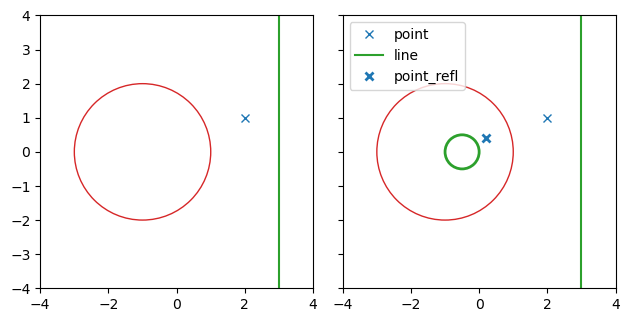

In [3]:
from clifford.g2c import *

point = up(2 * e1 + e2)
line = up(3 * e1 + 2 * e2) ^ up(3 * e1 - 2 * e2) ^ einf
circle = up(e1) ^ up(-e1 + 2 * e2) ^ up(-e1 - 2 * e2)

# point and line reflected in the circle

point_refl = circle * point.gradeInvol() * ~circle
line_refl = circle * line.gradeInvol() * ~circle

# pyganja
from pyganja import GanjaScene, draw
import pyganja; pyganja.__version__

# GanjaScene: build scenes out of geometric objects, with attached labels and RGB colors:

sc = GanjaScene()
sc.add_object(point, color=(255, 0, 0), label='point')
sc.add_object(line, color=(0, 255, 0), label='line')
sc.add_object(circle, color=(0, 0, 255), label='circle')

sc_refl = GanjaScene()
sc_refl.add_object(point_refl, color=(128, 0, 0), label='point_refl')
sc_refl.add_object(line_refl, color=(0, 128, 0), label='line_refl')

draw(sc, sig=layout.sig, scale=0.5)
draw(sc + sc_refl, sig=layout.sig, scale=0.5) # A cool feature of GanjaScene is the ability to use "+" to draw both scenes together:

# mpl_toolkits.clifford

from matplotlib import pyplot as plt
plt.ioff()  # we'll ask for plotting when we want it

# if you're editing this locally, you'll get an interactive UI if you uncomment the following
#
#    %matplotlib notebook

from mpl_toolkits.clifford import plot
import mpl_toolkits.clifford; mpl_toolkits.clifford.__version__

# standard matplotlib stuff - construct empty plots side-by-side, and set the scaling
fig, (ax_before, ax_both) = plt.subplots(1, 2, sharex=True, sharey=True)
ax_before.set(xlim=[-4, 4], ylim=[-4, 4], aspect='equal')
ax_both.set(xlim=[-4, 4], ylim=[-4, 4], aspect='equal')

# plot the objects before reflection on both plots
for ax in (ax_before, ax_both):
    plot(ax, [point], color='tab:blue', label='point', marker='x', linestyle=' ')
    plot(ax, [line], color='tab:green', label='line')
    plot(ax, [circle], color='tab:red', label='circle')

# plot the objects after reflection, with thicker lines
plot(ax_both, [point_refl], color='tab:blue', label='point_refl',  marker='x', linestyle=' ', markeredgewidth=2)
plot(ax_both, [line_refl], color='tab:green', label='line_refl', linewidth=2)

fig.tight_layout()
ax_both.legend()

# show the figure
fig

## G3C

<IPython.core.display.Javascript object>

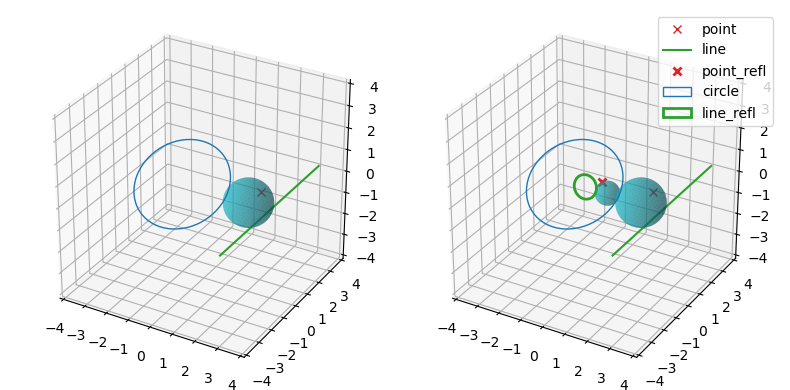

In [4]:
from clifford.g3c import *

point = up(2 * e1 + e2)
line = up(3 * e1 + 2 * e2) ^ up(3 * e1 - 2 * e2) ^ einf
circle = up(e1) ^ up(-e1 + 1.6 * e2 + 1.2 * e3) ^ up(-e1 - 1.6 * e2 - 1.2 * e3)
sphere = up(3 * e1) ^ up(e1) ^ up(2 * e1 + e2) ^ up(2 * e1 + e3)

# note that due to floating point rounding, we need to truncate back to a single grade here, with ``(grade)``
point_refl = homo((circle * point.gradeInvol() * ~circle)(1))
line_refl = (circle * line.gradeInvol() * ~circle)(3)
sphere_refl = (circle * sphere.gradeInvol() * ~circle)(4)

# pyganja

sc = GanjaScene()
sc.add_object(point, color=(255, 0, 0), label='point')
sc.add_object(line, color=(0, 255, 0), label='line')
sc.add_object(circle, color=(0, 0, 255), label='circle')
sc.add_object(sphere, color=(0, 255, 255), label='sphere')

sc_refl = GanjaScene()
sc_refl.add_object(point_refl, color=(128, 0, 0), label='point_refl')
sc_refl.add_object(line_refl.normal(), color=(0, 128, 0), label='line_refl')
sc_refl.add_object(sphere_refl.normal(), color=(0, 128, 128), label='sphere_refl')

draw(sc + sc_refl, scale=0.5)

# mpl_toolkits.clifford

# standard matplotlib stuff - construct empty plots side-by-side, and set the scaling
fig, (ax_before, ax_both) = plt.subplots(1, 2, subplot_kw=dict(projection='3d'), figsize=(8, 4))
ax_before.set(xlim=[-4, 4], ylim=[-4, 4], zlim=[-4, 4])
ax_both.set(xlim=[-4, 4], ylim=[-4, 4], zlim=[-4, 4])

# plot the objects before reflection on both plots
for ax in (ax_before, ax_both):
    plot(ax, [point], color='tab:red', label='point', marker='x', linestyle=' ')
    plot(ax, [line], color='tab:green', label='line')
    plot(ax, [circle], color='tab:blue', label='circle')
    plot(ax, [sphere], color='tab:cyan')  # labels do not work for spheres: pygae/mpl_toolkits.clifford#5

# plot the objects after reflection
plot(ax_both, [point_refl], color='tab:red', label='point_refl', marker='x', linestyle=' ', markeredgewidth=2)
plot(ax_both, [line_refl.normal()], color='tab:green', label='line_refl', linewidth=2)
plot(ax_both, [sphere_refl], color='tab:cyan')

fig.tight_layout()
ax_both.legend()

# show the figure
fig